In [31]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [32]:
educacion = pd.read_csv('/home/rodrigo/Downloads/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')
genero_y_edad = pd.read_csv('/home/rodrigo/Downloads/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')
vistas = pd.read_csv('/home/rodrigo/Downloads/datos_navent_fiuba/fiuba_3_vistas.csv')
postulaciones = pd.read_csv('/home/rodrigo/Downloads/datos_navent_fiuba/fiuba_4_postulaciones.csv')
avisos_online = pd.read_csv('/home/rodrigo/Downloads/datos_navent_fiuba/fiuba_5_avisos_online.csv')
detalle_avisos = pd.read_csv('/home/rodrigo/Downloads/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')

In [33]:
educacion.isnull().sum()

idpostulante    0
nombre          0
estado          0
dtype: int64

# Veamos un poco la distribucion en la educacion

Text(0,0.5,'Cantidad de Postulantes')

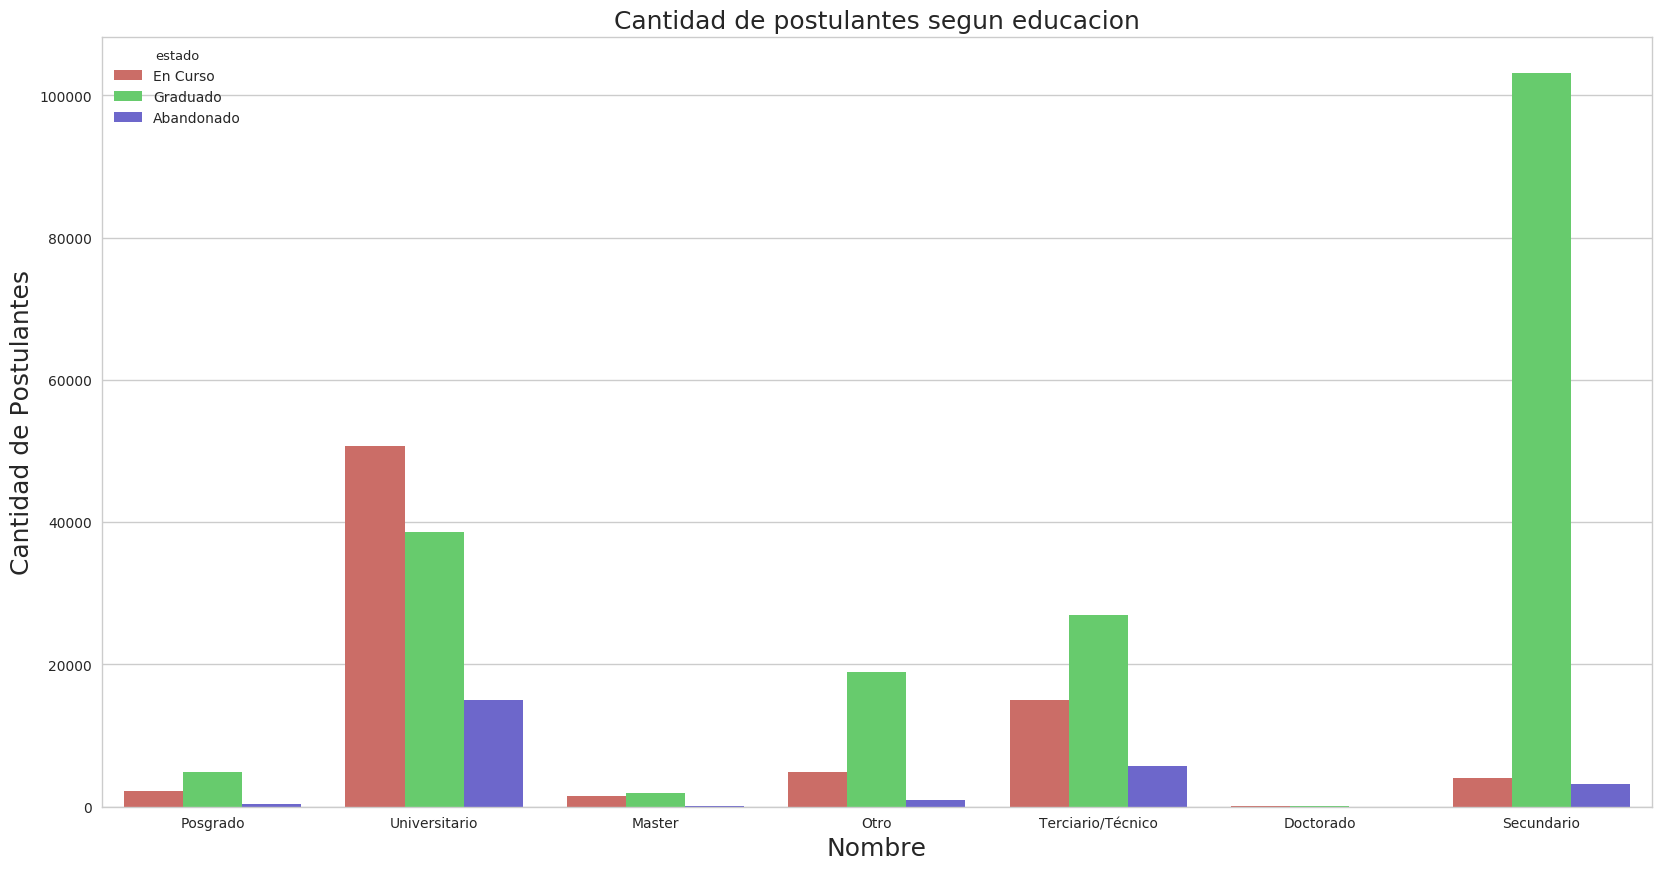

In [34]:


g = sns.countplot(x="nombre", hue="estado", data=educacion, palette="hls")
g.set_title("Cantidad de postulantes segun educacion", fontsize=18)
g.set_xlabel("Nombre", fontsize=18)
g.set_ylabel("Cantidad de Postulantes", fontsize=18)

# Genero y Edad

In [35]:
genero_y_edad.isnull().sum()

idpostulante          0
fechanacimiento    4750
sexo                  0
dtype: int64

Saquemos los registros que no tienen fecha de nacimiento

In [36]:
genero_y_edad = genero_y_edad.dropna(subset=['fechanacimiento'])

In [37]:
genero_y_edad.isnull().sum()

idpostulante       0
fechanacimiento    0
sexo               0
dtype: int64

In [38]:
genero_y_edad['fechanacimiento'] = pd.to_datetime(genero_y_edad['fechanacimiento'], errors='coerce')

Obtengamos la edad de los postulantes

In [39]:
genero_y_edad.isnull().sum()

idpostulante       0
fechanacimiento    7
sexo               0
dtype: int64

Aqui tenemos las fechas invalidas tomadas como nulos

In [40]:
genero_y_edad = genero_y_edad.dropna(subset=['fechanacimiento'])

In [41]:
genero_y_edad.isnull().sum()

idpostulante       0
fechanacimiento    0
sexo               0
dtype: int64

Con los datos correctos obtengamos ahora las edades

In [42]:
now = pd.Timestamp(datetime.datetime.now())  

In [43]:
genero_y_edad['age'] = (now - genero_y_edad['fechanacimiento']).astype('timedelta64[Y]').astype(int)

In [44]:
del genero_y_edad['fechanacimiento']

Text(0,0.5,'Edad')

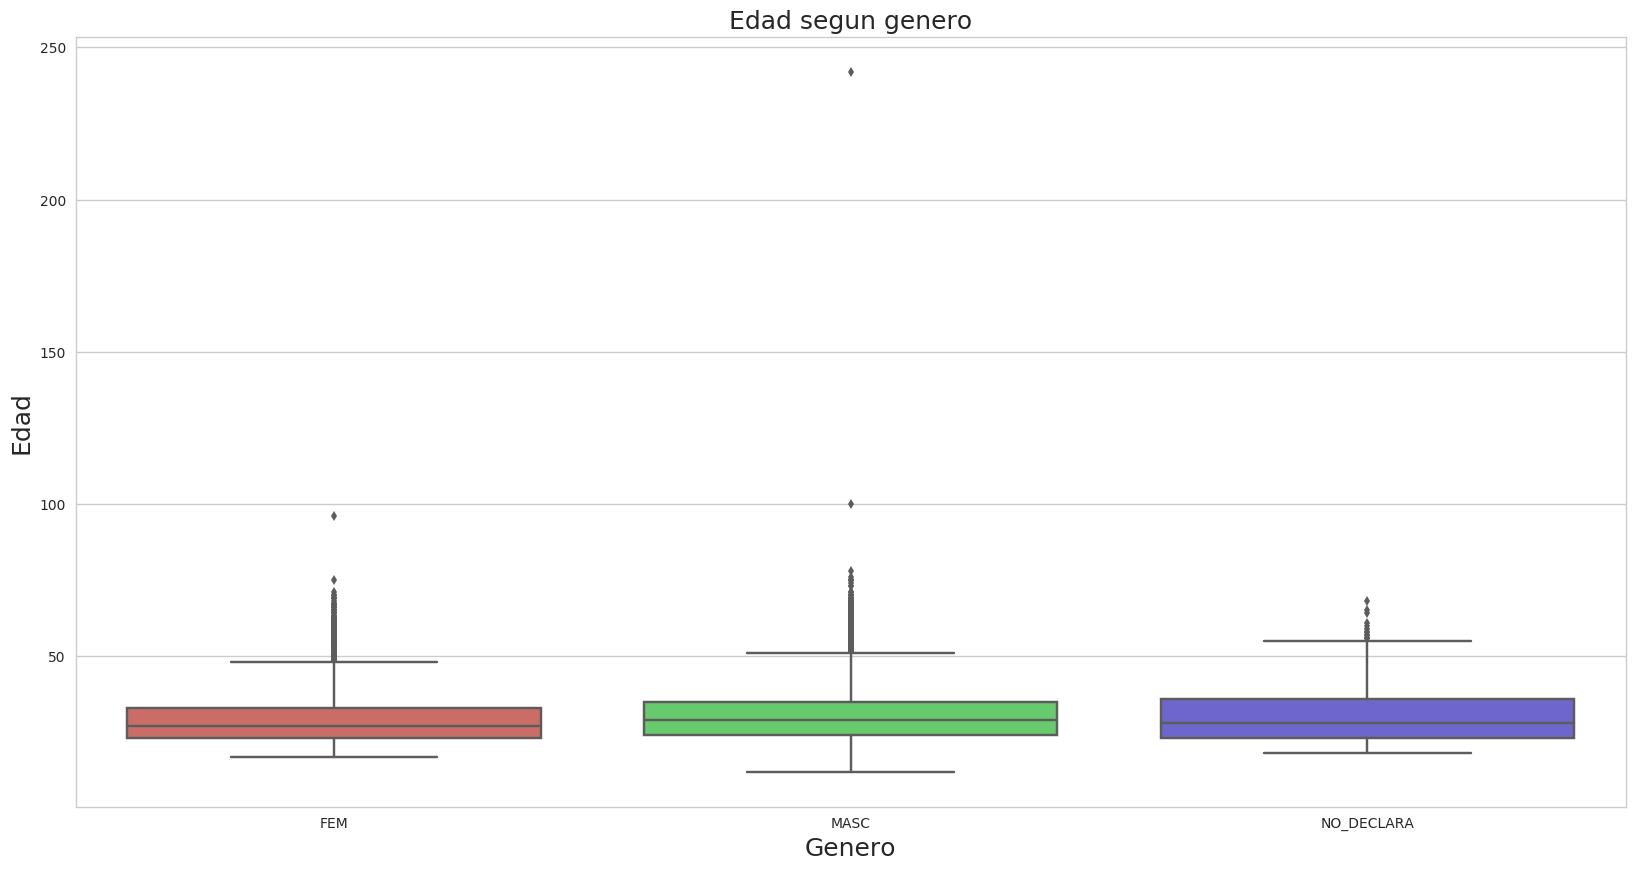

In [45]:
g = sns.boxplot(x="sexo", y="age", 
                     data=genero_y_edad, palette="hls")
g.set_title("Edad segun genero", fontsize=18)
g.set_xlabel("Genero", fontsize=18)
g.set_ylabel("Edad", fontsize=18)

Vemos que hay valores ilogicos (una persona no puede tener 247 anios)

Text(0.5,1,'Postulantes segun edad')

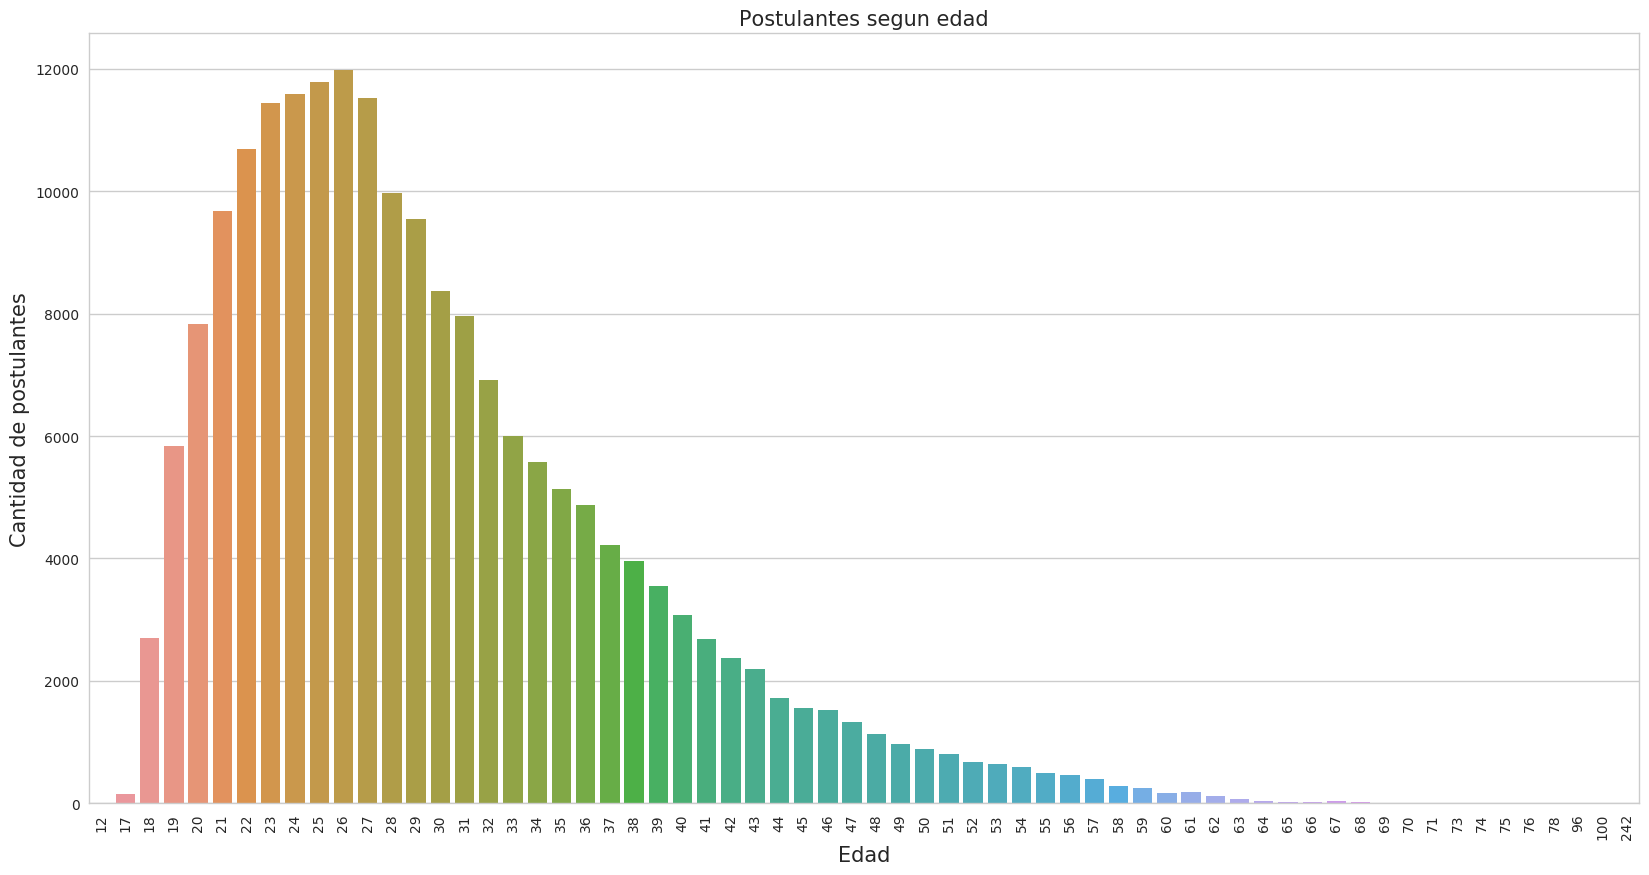

In [46]:
g = sns.countplot(x='age', data=genero_y_edad, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Edad", fontsize=15)
g.set_ylabel("Cantidad de postulantes", fontsize=15)
g.set_title("Postulantes segun edad", fontsize=15)

# Vistas

In [47]:
vistas['timestamp'] = pd.to_datetime(vistas['timestamp'])

In [48]:
vistas.isnull().sum()

idAviso         0
timestamp       0
idpostulante    0
dtype: int64

In [49]:
vistas.rename(columns={'timestamp':'fechavista'}, inplace=True)

In [50]:
vistas['fechavista'].max()

Timestamp('2018-03-01 04:59:56.812000')

In [51]:
vistas['fechavista'].min()

Timestamp('2018-02-23 18:38:10.808000')

In [52]:
vistas['month'] = vistas['fechavista'].dt.month

Text(0.5,1,'Vistas segun mes')

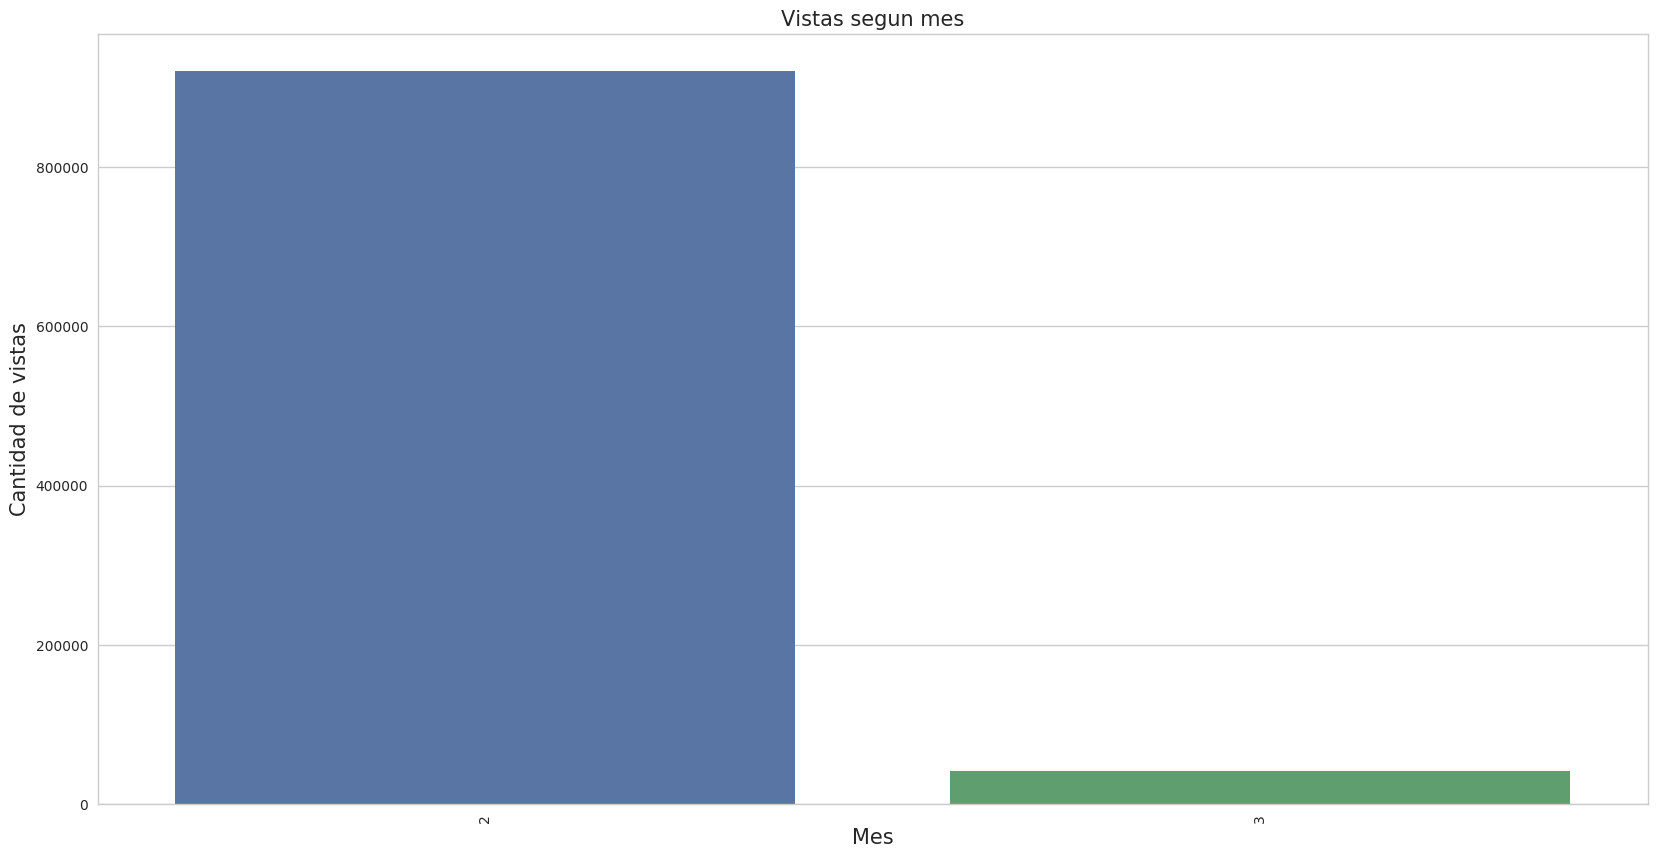

In [53]:
g = sns.countplot(x='month', data=vistas, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Mes", fontsize=15)
g.set_ylabel("Cantidad de vistas", fontsize=15)
g.set_title("Vistas segun mes", fontsize=15)

In [54]:
vistas['weekday_name'] = vistas['fechavista'].dt.weekday_name

Text(0.5,1,'Vistas segun dia de la semana')

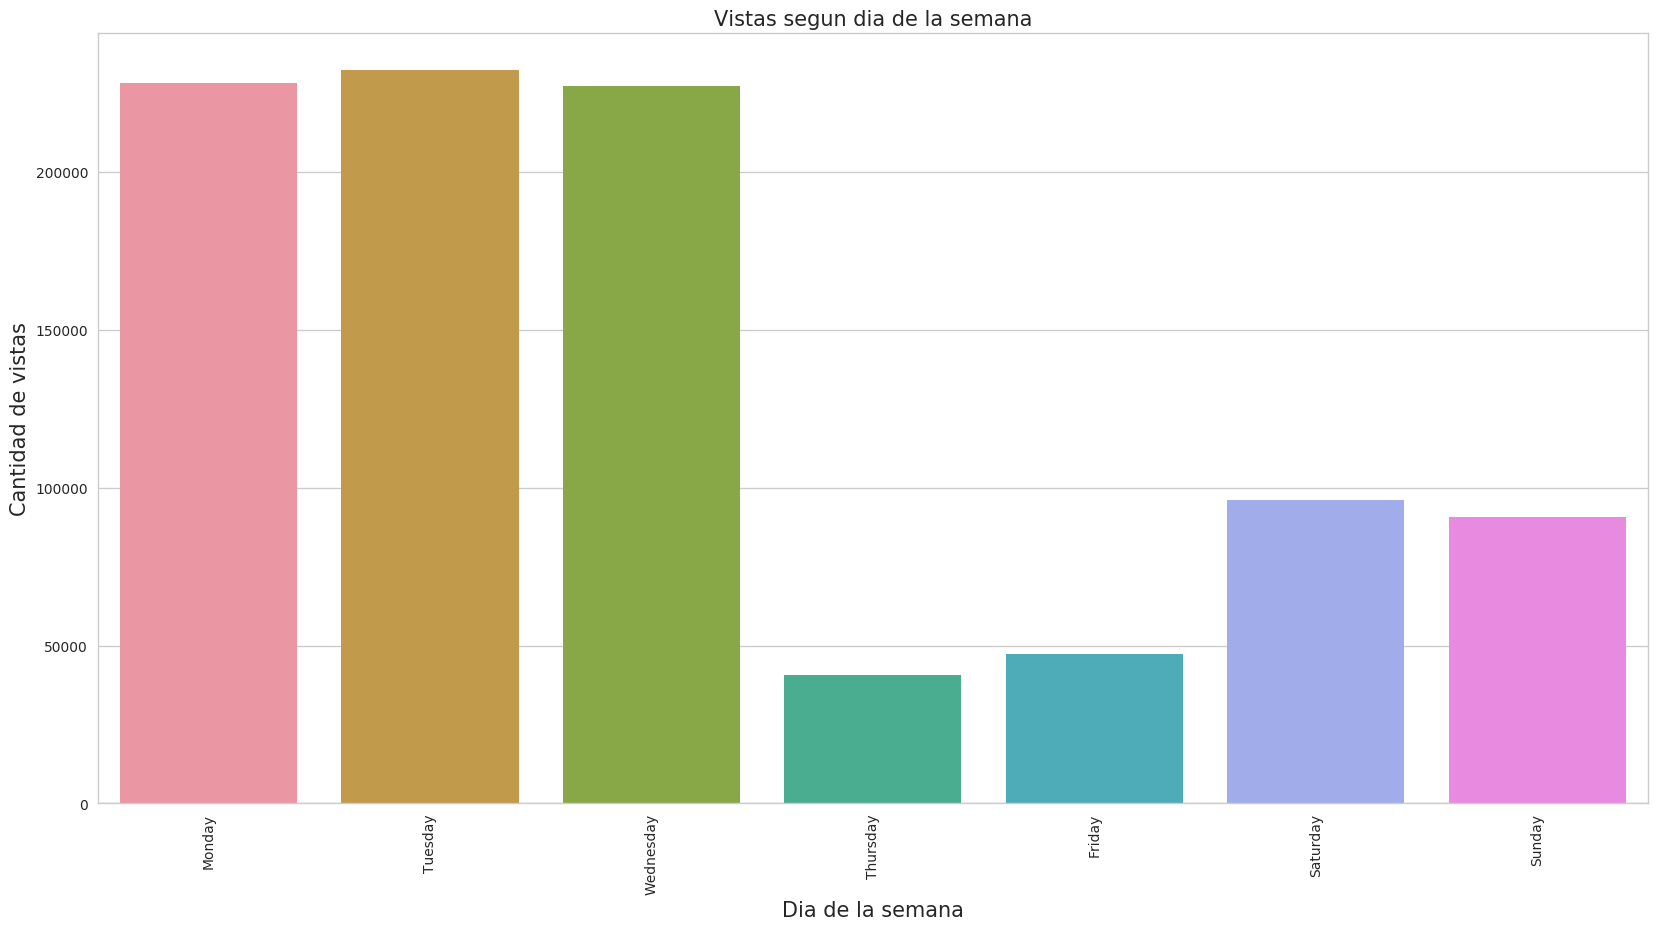

In [55]:
g = sns.countplot(x='weekday_name', data=vistas, order= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dia de la semana", fontsize=15)
g.set_ylabel("Cantidad de vistas", fontsize=15)
g.set_title("Vistas segun dia de la semana", fontsize=15)

# Postulaciones

In [62]:
postulaciones['fechapostulacion'] = pd.to_datetime(postulaciones['fechapostulacion'])

In [63]:
postulaciones['fechapostulacion'].max()

Timestamp('2018-02-28 23:59:55')

In [64]:
postulaciones['fechapostulacion'].min()

Timestamp('2018-01-15 00:00:01')

In [65]:
postulaciones['month'] = postulaciones['fechapostulacion'].dt.month

Text(0.5,1,'Postulaciones segun mes')

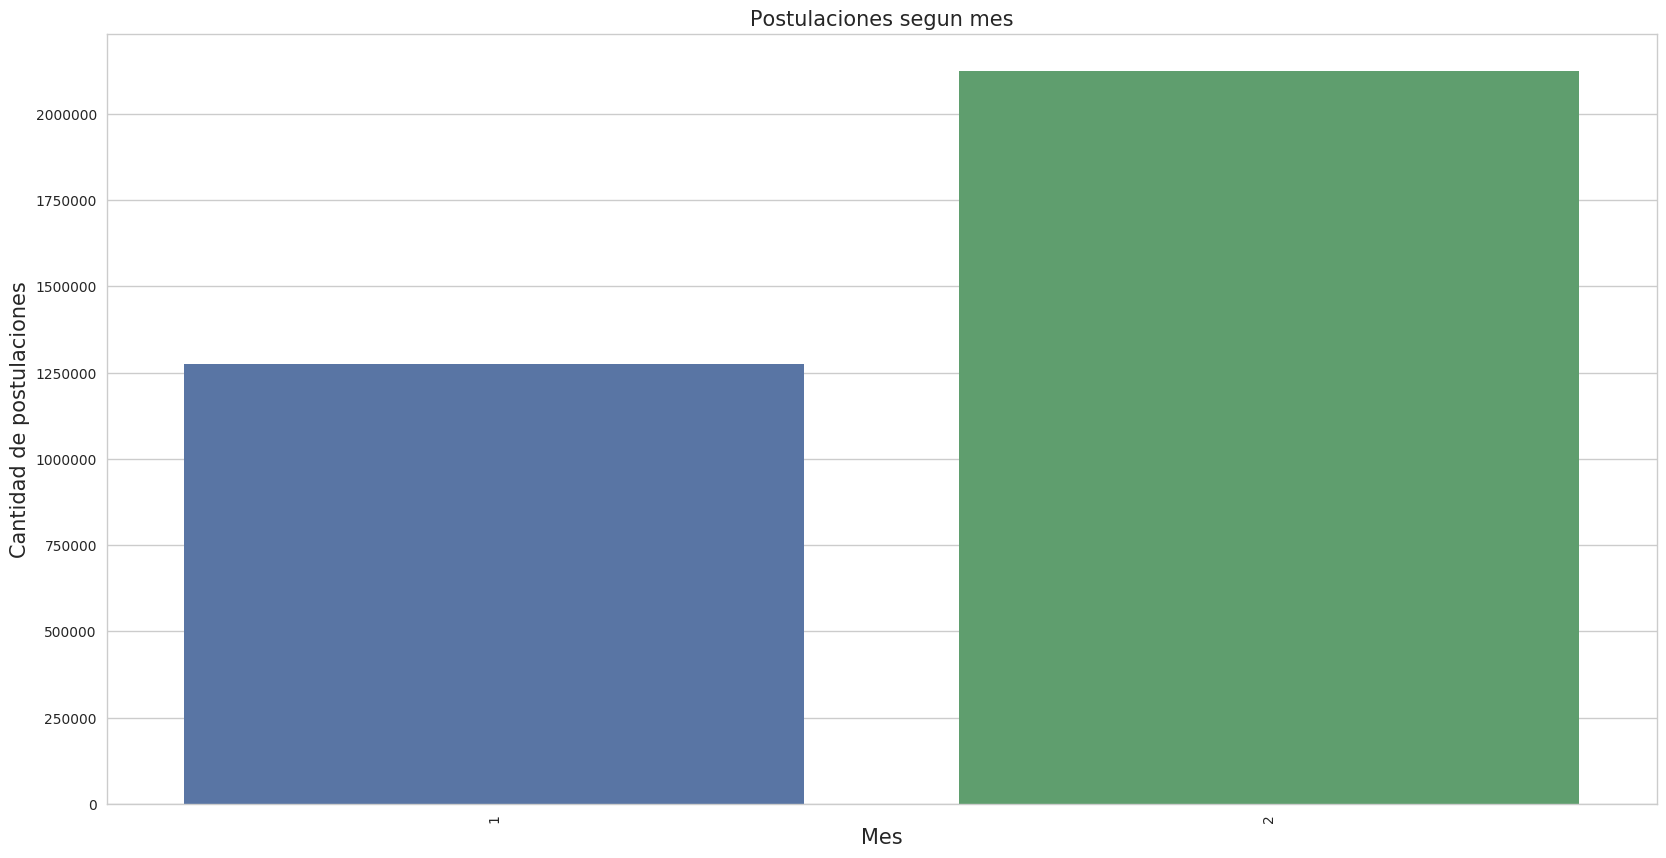

In [66]:
g = sns.countplot(x='month', data=postulaciones, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Mes", fontsize=15)
g.set_ylabel("Cantidad de postulaciones", fontsize=15)
g.set_title("Postulaciones segun mes", fontsize=15)